In [2]:
import distutils


In [3]:
!mlflow --version

mlflow, version 2.13.0


In [4]:
# importing relevant libraries

import pandas as pd
import datetime
import numpy as np

#importing expriment tracking 
import mlflow

#setting tracking uri 

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc_taxi_experiment")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/1', creation_time=1716673642782, experiment_id='1', last_update_time=1716673642782, lifecycle_stage='active', name='nyc_taxi_experiment', tags={}>

# Data links 
Jan - 2023 https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Feb 2023  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Mar 2023  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet

In [3]:
#reading in the dataset
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet').sample(n = 50000)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1161574,2,2023-01-13 17:40:28,2023-01-13 17:54:51,1.0,1.65,1.0,N,113,246,1,14.20,2.5,0.5,3.10,0.0,1.0,23.80,2.5,0.0
2057404,2,2023-01-22 13:58:17,2023-01-22 14:11:35,1.0,1.50,1.0,N,230,233,1,12.80,0.0,0.5,3.36,0.0,1.0,20.16,2.5,0.0
2172115,2,2023-01-23 19:10:23,2023-01-23 19:28:01,2.0,8.25,1.0,N,140,231,2,33.80,2.5,0.5,0.00,0.0,1.0,40.30,2.5,0.0
1334766,2,2023-01-15 10:20:28,2023-01-15 10:27:49,1.0,1.84,1.0,N,262,163,1,10.70,0.0,0.5,1.50,0.0,1.0,16.20,2.5,0.0
20280,1,2023-01-01 04:21:56,2023-01-01 04:37:17,1.0,4.30,5.0,N,50,263,2,29.55,0.0,0.0,0.00,0.0,1.0,30.55,0.0,0.0


In [5]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [6]:
# Computing duration 
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)

/tmp/ipykernel_198184/1280888230.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['duration'] = df['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)


In [7]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
1161574,2,2023-01-13 17:40:28,2023-01-13 17:54:51,1.0,1.65,1.0,N,113,246,1,14.20,2.5,0.5,3.10,0.0,1.0,23.80,2.5,0.0,14.0
2057404,2,2023-01-22 13:58:17,2023-01-22 14:11:35,1.0,1.50,1.0,N,230,233,1,12.80,0.0,0.5,3.36,0.0,1.0,20.16,2.5,0.0,13.0
2172115,2,2023-01-23 19:10:23,2023-01-23 19:28:01,2.0,8.25,1.0,N,140,231,2,33.80,2.5,0.5,0.00,0.0,1.0,40.30,2.5,0.0,18.0
1334766,2,2023-01-15 10:20:28,2023-01-15 10:27:49,1.0,1.84,1.0,N,262,163,1,10.70,0.0,0.5,1.50,0.0,1.0,16.20,2.5,0.0,7.0
20280,1,2023-01-01 04:21:56,2023-01-01 04:37:17,1.0,4.30,5.0,N,50,263,2,29.55,0.0,0.0,0.00,0.0,1.0,30.55,0.0,0.0,15.0


In [8]:
# Computing the standard deviation of the trips in Jnauary
np.std(df['duration'])

44.47963762686921

In [9]:
# Computing the percentage of data left after dropping outliers  

df['duration'].shape[0]

50000

In [10]:
# Applying the defined outlier logic
df_trimmed = df[(df['duration'] >= 1 )&(df['duration'] <= 60)]

In [11]:
df_trimmed.shape[0]

49220

In [12]:
#computing the fraction left 
100 - ((df['duration'].shape[0] - df_trimmed.shape[0])/(df['duration'].shape[0]))*100

98.44

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
df_trimmed.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [15]:
categorical = ['PULocationID','DOLocationID']
numerical = ['duration']

In [16]:
# encoding the prescribed columns 
# casting as strings first

df_trimmed['PULocationID'] = df_trimmed['PULocationID'].astype('str')
df_trimmed['DOLocationID'] = df_trimmed['PULocationID'].astype('str')



/tmp/ipykernel_198184/1427150686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['PULocationID'] = df_trimmed['PULocationID'].astype('str')
/tmp/ipykernel_198184/1427150686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['DOLocationID'] = df_trimmed['PULocationID'].astype('str')


In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
# fitting the encoder and deriving a feature matrix
#df_trimmed = df_trimmed.sample(n = 500000)

# y = df_trimmed.duration

# df_trimmed = df_trimmed[['PULocationID', 'DOLocationID']]
# X = pd.get_dummies(df_trimmed, columns=['PULocationID', 'DOLocationID'])

dv = DictVectorizer()
train_dicts = df_trimmed[['PULocationID', 'DOLocationID']].to_dict(orient = 'records')

In [34]:
X_train = dv.fit_transform(train_dicts)

In [35]:
y_train = df_trimmed['duration'].values

In [21]:
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
#logging experiment 1 with MLFlow - Linear regression 
with mlflow.start_run():

    mlflow.set_tag("developer", "Abiodun Gbadamosi")

    mlflow.log_param("train_data_path", 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
    mlflow.log_param("validation_data_path",'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

    model = LinearRegression()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    
    rmse = mean_squared_error(y_train, y_pred, squared = False)
    mlflow.log_metric("rmse", rmse)
print(f"Mean squared error: {rmse:.2f}")

Mean squared error: 8.49


In [23]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X.sample, y, test_size=0.2, random_state=42)

#logging experiment 2 with MLFlow - XG Boost (USING THE HYPEROPT HYPERPARAMETER TUNING LIBRARY)

In [23]:
# bringing in my validation set
validation = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet').sample(n = 50000)
# Computing duration 
validation['duration'] = validation['tpep_dropoff_datetime'] - validation['tpep_pickup_datetime']
validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)


# validation  
# casting as strings first
validation = validation[(validation['duration'] >= 1 )&(validation['duration'] <= 60)]
validation['PULocationID'] = validation['PULocationID'].astype('str')
validation['DOLocationID'] = validation['PULocationID'].astype('str')

y_val = validation.duration.values

validation = validation[['PULocationID', 'DOLocationID']].to_dict(orient = 'records')


X_validation = dv.transform(validation)


/tmp/ipykernel_198184/2736253522.py:5: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)


In [24]:
import xgboost as xgb

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope


In [25]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_validation, label=y_val)

In [26]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=5
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [27]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

[0]	validation-rmse:9.88678                                                                                                     
[1]	validation-rmse:9.68954                                                                                                     
[2]	validation-rmse:9.52633                                                                                                     
[3]	validation-rmse:9.39145                                                                                                     
[4]	validation-rmse:9.27922                                                                                                     
[5]	validation-rmse:9.18712                                                                                                     
[6]	validation-rmse:9.11145                                                                                                     
[7]	validation-rmse:9.04904                                                                      

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[8]	validation-rmse:8.99763                                                                                                     
[9]	validation-rmse:8.95417                                                                                                     
[10]	validation-rmse:8.91859                                                                                                    
[11]	validation-rmse:8.88994                                                                                                    
[12]	validation-rmse:8.86629                                                                                                    
[13]	validation-rmse:8.84674                                                                                                    
[14]	validation-rmse:8.82883                                                                                                    
[15]	validation-rmse:8.81426                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[10]	validation-rmse:8.73712
[11]	validation-rmse:8.73574                                                                                                    
[12]	validation-rmse:8.73498                                                                                                    
[13]	validation-rmse:8.73383                                                                                                    
[14]	validation-rmse:8.73312                                                                                                    
[15]	validation-rmse:8.73196                                                                                                    
[16]	validation-rmse:8.73079                                                                                                    
[17]	validation-rmse:8.72973                                                                                                    
[18]	validation-rmse:8.72965                                        

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.66200                                                                                                     
[1]	validation-rmse:9.36332                                                                                                     
[2]	validation-rmse:9.17041                                                                                                     
[3]	validation-rmse:9.04460                                                                                                     
[4]	validation-rmse:8.96439                                                                                                     
[5]	validation-rmse:8.90872                                                                                                     
[6]	validation-rmse:8.87465                                                                                                     
[7]	validation-rmse:8.84829                                                                      

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[15]	validation-rmse:8.78325                                                                                                    
[16]	validation-rmse:8.78127                                                                                                    
[17]	validation-rmse:8.77948                                                                                                    
[18]	validation-rmse:8.77486                                                                                                    
[19]	validation-rmse:8.77200                                                                                                    
[20]	validation-rmse:8.77158                                                                                                    
[21]	validation-rmse:8.76931                                                                                                    
[22]	validation-rmse:8.76684                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[14]	validation-rmse:8.74419                                                                                                    
[15]	validation-rmse:8.74420                                                                                                    
[16]	validation-rmse:8.74376                                                                                                    
[17]	validation-rmse:8.74246                                                                                                    
[18]	validation-rmse:8.74085                                                                                                    
[19]	validation-rmse:8.74076                                                                                                    
[20]	validation-rmse:8.74115                                                                                                    
[21]	validation-rmse:8.74103                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[17]	validation-rmse:8.96597
[18]	validation-rmse:8.94876                                                                                                    
[19]	validation-rmse:8.93277                                                                                                    
[20]	validation-rmse:8.91916                                                                                                    
[21]	validation-rmse:8.90680                                                                                                    
[22]	validation-rmse:8.89523                                                                                                    
[23]	validation-rmse:8.88470                                                                                                    
[24]	validation-rmse:8.87591                                                                                                    
[25]	validation-rmse:8.86826                                        

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[11]	validation-rmse:9.12521                                                                                                    
[12]	validation-rmse:9.08817                                                                                                    
[13]	validation-rmse:9.05482                                                                                                    
[14]	validation-rmse:9.02581                                                                                                    
[15]	validation-rmse:8.99893                                                                                                    
[16]	validation-rmse:8.97604                                                                                                    
[17]	validation-rmse:8.95470                                                                                                    
[18]	validation-rmse:8.93507                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:8.97039                                                                                                     
[10]	validation-rmse:8.93315                                                                                                    
[11]	validation-rmse:8.90255                                                                                                    
[12]	validation-rmse:8.87586                                                                                                    
[13]	validation-rmse:8.85428                                                                                                    
[14]	validation-rmse:8.83569                                                                                                    
[15]	validation-rmse:8.82063                                                                                                    
[16]	validation-rmse:8.80742                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[8]	validation-rmse:8.77985                                                                                                     
[9]	validation-rmse:8.76583                                                                                                     
[10]	validation-rmse:8.75235                                                                                                    
[11]	validation-rmse:8.74536                                                                                                    
[12]	validation-rmse:8.73830                                                                                                    
[13]	validation-rmse:8.73326                                                                                                    
[14]	validation-rmse:8.73021                                                                                                    
[15]	validation-rmse:8.72809                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[18]	validation-rmse:8.76344                                                                                                    
[19]	validation-rmse:8.76125                                                                                                    
[20]	validation-rmse:8.76074                                                                                                    
[21]	validation-rmse:8.75858                                                                                                    
[22]	validation-rmse:8.75723                                                                                                    
[23]	validation-rmse:8.75686                                                                                                    
[24]	validation-rmse:8.75626                                                                                                    
[25]	validation-rmse:8.75522                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[7]	validation-rmse:8.73425                                                                                                     
[8]	validation-rmse:8.73508                                                                                                     
[9]	validation-rmse:8.73529                                                                                                     
[10]	validation-rmse:8.73294                                                                                                    
[11]	validation-rmse:8.73357                                                                                                    
[12]	validation-rmse:8.73379                                                                                                    
[13]	validation-rmse:8.73148                                                                                                    
[14]	validation-rmse:8.73228                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[7]	validation-rmse:8.72629
[8]	validation-rmse:8.72738                                                                                                     
[0]	validation-rmse:8.80500                                                                                                     
[1]	validation-rmse:8.77238                                                                                                     
[2]	validation-rmse:8.75827                                                                                                     
[3]	validation-rmse:8.75260                                                                                                     
[4]	validation-rmse:8.74862                                                                                                     
[5]	validation-rmse:8.74459                                                                                                     
[6]	validation-rmse:8.74257                                          

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.81014                                                                                                     
[1]	validation-rmse:8.73158                                                                                                     
[2]	validation-rmse:8.72220                                                                                                     
[3]	validation-rmse:8.72629                                                                                                     
[4]	validation-rmse:8.72651                                                                                                     
[5]	validation-rmse:8.72700                                                                                                     
 26%|███████████████                                           | 13/50 [00:31<00:44,  1.21s/trial, best loss: 8.697838375136284]

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:8.72784                                                                                                     
[7]	validation-rmse:8.72820                                                                                                     
[0]	validation-rmse:9.11345                                                                                                     
[1]	validation-rmse:8.83992                                                                                                     
[2]	validation-rmse:8.76401                                                                                                     
[3]	validation-rmse:8.74323                                                                                                     
[4]	validation-rmse:8.73760                                                                                                     
[5]	validation-rmse:8.73530                                                                      

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:8.73558                                                                                                     
[7]	validation-rmse:8.73549                                                                                                     
[8]	validation-rmse:8.73564                                                                                                     
[9]	validation-rmse:8.73605                                                                                                     
[0]	validation-rmse:9.42470                                                                                                     
[1]	validation-rmse:9.08386                                                                                                     
[2]	validation-rmse:8.91762                                                                                                     
[3]	validation-rmse:8.83698                                                                      

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:08:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[10]	validation-rmse:8.74261                                                                                                    
[11]	validation-rmse:8.74086                                                                                                    
[12]	validation-rmse:8.73899                                                                                                    
[13]	validation-rmse:8.73746                                                                                                    
[14]	validation-rmse:8.73699                                                                                                    
[15]	validation-rmse:8.73591                                                                                                    
[16]	validation-rmse:8.73565                                                                                                    
[17]	validation-rmse:8.73475                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:09:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[8]	validation-rmse:9.24747
[9]	validation-rmse:9.19451                                                                                                     
[10]	validation-rmse:9.14786                                                                                                    
[11]	validation-rmse:9.10625                                                                                                    
[12]	validation-rmse:9.06863                                                                                                    
[13]	validation-rmse:9.03531                                                                                                    
[14]	validation-rmse:9.00585                                                                                                    
[15]	validation-rmse:8.97928                                                                                                    
[16]	validation-rmse:8.95579                                         

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:09:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:9.44764                                                                                                     
[7]	validation-rmse:9.38332                                                                                                     
[8]	validation-rmse:9.32509                                                                                                     
[9]	validation-rmse:9.27240                                                                                                     
[10]	validation-rmse:9.22454                                                                                                    
[11]	validation-rmse:9.18126                                                                                                    
[12]	validation-rmse:9.14181                                                                                                    
[13]	validation-rmse:9.10632                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:09:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:9.37509
[7]	validation-rmse:9.30801                                                                                                     
[8]	validation-rmse:9.24816                                                                                                     
[9]	validation-rmse:9.19466                                                                                                     
[10]	validation-rmse:9.14705                                                                                                    
[11]	validation-rmse:9.10352                                                                                                    
[12]	validation-rmse:9.06498                                                                                                    
[13]	validation-rmse:9.03098                                                                                                    
[14]	validation-rmse:9.00087                                         

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:09:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[10]	validation-rmse:8.79927                                                                                                    
[11]	validation-rmse:8.77909                                                                                                    
[12]	validation-rmse:8.76321                                                                                                    
[13]	validation-rmse:8.75069                                                                                                    
[14]	validation-rmse:8.74077                                                                                                    
[15]	validation-rmse:8.73288                                                                                                    
[16]	validation-rmse:8.72657                                                                                                    
[17]	validation-rmse:8.72151                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:09:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[10]	validation-rmse:8.75460                                                                                                    
[11]	validation-rmse:8.74127                                                                                                    
[12]	validation-rmse:8.73121                                                                                                    
[13]	validation-rmse:8.72359                                                                                                    
[14]	validation-rmse:8.71776                                                                                                    
[15]	validation-rmse:8.71328                                                                                                    
[16]	validation-rmse:8.70981                                                                                                    
[17]	validation-rmse:8.70709                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:09:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:8.82200                                                                                                     
[10]	validation-rmse:8.79629                                                                                                    
[11]	validation-rmse:8.77615                                                                                                    
[12]	validation-rmse:8.76032                                                                                                    
[13]	validation-rmse:8.74785                                                                                                    
[14]	validation-rmse:8.73797                                                                                                    
[15]	validation-rmse:8.73012                                                                                                    
[16]	validation-rmse:8.72385                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:09:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[7]	validation-rmse:8.84557                                                                                                     
[8]	validation-rmse:8.81050                                                                                                     
[9]	validation-rmse:8.78412                                                                                                     
[10]	validation-rmse:8.76420                                                                                                    
[11]	validation-rmse:8.74908                                                                                                    
[12]	validation-rmse:8.73756                                                                                                    
[13]	validation-rmse:8.72872                                                                                                    
[14]	validation-rmse:8.72190                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:9.16274                                                                                                     
[7]	validation-rmse:9.09548                                                                                                     
[8]	validation-rmse:9.03923                                                                                                     
[9]	validation-rmse:8.99249                                                                                                     
[10]	validation-rmse:8.95315                                                                                                    
[11]	validation-rmse:8.91981                                                                                                    
[12]	validation-rmse:8.89212                                                                                                    
[13]	validation-rmse:8.86842                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[7]	validation-rmse:8.87725                                                                                                     
[8]	validation-rmse:8.83758                                                                                                     
[9]	validation-rmse:8.80706                                                                                                     
[10]	validation-rmse:8.78351                                                                                                    
[11]	validation-rmse:8.76527                                                                                                    
[12]	validation-rmse:8.75110                                                                                                    
[13]	validation-rmse:8.74004                                                                                                    
[14]	validation-rmse:8.73136                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[7]	validation-rmse:8.72473                                                                                                     
[8]	validation-rmse:8.72368                                                                                                     
[9]	validation-rmse:8.72363                                                                                                     
[10]	validation-rmse:8.72317                                                                                                    
[11]	validation-rmse:8.72162                                                                                                    
[12]	validation-rmse:8.72033                                                                                                    
[13]	validation-rmse:8.72072                                                                                                    
[14]	validation-rmse:8.72091                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[10]	validation-rmse:8.74590                                                                                                    
[11]	validation-rmse:8.73586                                                                                                    
[12]	validation-rmse:8.72846                                                                                                    
[13]	validation-rmse:8.72296                                                                                                    
[14]	validation-rmse:8.71883                                                                                                    
[15]	validation-rmse:8.71570                                                                                                    
[16]	validation-rmse:8.71331                                                                                                    
[17]	validation-rmse:8.71147                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:11] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:8.87020                                                                                                     
[10]	validation-rmse:8.83854                                                                                                    
[11]	validation-rmse:8.81305                                                                                                    
[12]	validation-rmse:8.79224                                                                                                    
[13]	validation-rmse:8.77562                                                                                                    
[14]	validation-rmse:8.76202                                                                                                    
[15]	validation-rmse:8.75099                                                                                                    
[16]	validation-rmse:8.74201                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:9.03229                                                                                                     
[10]	validation-rmse:8.99117                                                                                                    
[11]	validation-rmse:8.95614                                                                                                    
[12]	validation-rmse:8.92635                                                                                                    
[13]	validation-rmse:8.89974                                                                                                    
[14]	validation-rmse:8.87702                                                                                                    
[15]	validation-rmse:8.85800                                                                                                    
[16]	validation-rmse:8.84172                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:9.22632                                                                                                     
[5]	validation-rmse:9.13426                                                                                                     
[6]	validation-rmse:9.05936                                                                                                     
[7]	validation-rmse:8.99854                                                                                                     
[8]	validation-rmse:8.94945                                                                                                     
[9]	validation-rmse:8.90711                                                                                                     
[10]	validation-rmse:8.87396                                                                                                    
[11]	validation-rmse:8.84612                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[10]	validation-rmse:8.85788                                                                                                    
[11]	validation-rmse:8.83337                                                                                                    
[12]	validation-rmse:8.81332                                                                                                    
[13]	validation-rmse:8.79703                                                                                                    
[14]	validation-rmse:8.78393                                                                                                    
[15]	validation-rmse:8.77333                                                                                                    
[16]	validation-rmse:8.76409                                                                                                    
[17]	validation-rmse:8.75503                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:10:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[10]	validation-rmse:9.02445                                                                                                    
[11]	validation-rmse:8.98739                                                                                                    
[12]	validation-rmse:8.95539                                                                                                    
[13]	validation-rmse:8.92774                                                                                                    
[14]	validation-rmse:8.90391                                                                                                    
[15]	validation-rmse:8.88307                                                                                                    
[16]	validation-rmse:8.86532                                                                                                    
[17]	validation-rmse:8.84992                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:8.74776                                                                                                     
[10]	validation-rmse:8.74200                                                                                                    
[11]	validation-rmse:8.73845                                                                                                    
[12]	validation-rmse:8.73618                                                                                                    
[13]	validation-rmse:8.73461                                                                                                    
[14]	validation-rmse:8.73129                                                                                                    
[15]	validation-rmse:8.73077                                                                                                    
[16]	validation-rmse:8.73044                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[8]	validation-rmse:9.11947                                                                                                     
[9]	validation-rmse:9.06690                                                                                                     
[10]	validation-rmse:9.02119                                                                                                    
[11]	validation-rmse:8.98144                                                                                                    
[12]	validation-rmse:8.94687                                                                                                    
[13]	validation-rmse:8.91680                                                                                                    
[14]	validation-rmse:8.89064                                                                                                    
[15]	validation-rmse:8.86785                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:19] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:8.73089                                                                                                     
[7]	validation-rmse:8.71789                                                                                                     
[8]	validation-rmse:8.71016                                                                                                     
[9]	validation-rmse:8.70550                                                                                                     
[10]	validation-rmse:8.70297                                                                                                    
[11]	validation-rmse:8.70117                                                                                                    
[12]	validation-rmse:8.70009                                                                                                    
[13]	validation-rmse:8.69927                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:8.73215                                                                                                     
[5]	validation-rmse:8.72730                                                                                                     
[6]	validation-rmse:8.72560                                                                                                     
[7]	validation-rmse:8.72393                                                                                                     
[8]	validation-rmse:8.72305                                                                                                     
[9]	validation-rmse:8.72220                                                                                                     
[10]	validation-rmse:8.71761                                                                                                    
[11]	validation-rmse:8.71812                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[8]	validation-rmse:8.75142                                                                                                     
[9]	validation-rmse:8.74574                                                                                                     
[10]	validation-rmse:8.74287                                                                                                    
[11]	validation-rmse:8.74137                                                                                                    
[12]	validation-rmse:8.73927                                                                                                    
[13]	validation-rmse:8.73881                                                                                                    
[14]	validation-rmse:8.73812                                                                                                    
[15]	validation-rmse:8.73681                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:8.73531                                                                                                     
[6]	validation-rmse:8.73629                                                                                                     
[7]	validation-rmse:8.73434                                                                                                     
[8]	validation-rmse:8.73548                                                                                                     
[9]	validation-rmse:8.73609                                                                                                     
[10]	validation-rmse:8.73617                                                                                                    
[11]	validation-rmse:8.73629                                                                                                    
[12]	validation-rmse:8.73501                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[7]	validation-rmse:8.70442                                                                                                     
[8]	validation-rmse:8.70065                                                                                                     
[9]	validation-rmse:8.69839                                                                                                     
[10]	validation-rmse:8.69705                                                                                                    
[11]	validation-rmse:8.69626                                                                                                    
[12]	validation-rmse:8.69572                                                                                                    
[13]	validation-rmse:8.69533                                                                                                    
[14]	validation-rmse:8.69512                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:8.69873                                                                                                     
[10]	validation-rmse:8.69786                                                                                                    
[11]	validation-rmse:8.69733                                                                                                    
[12]	validation-rmse:8.69700                                                                                                    
[13]	validation-rmse:8.69679                                                                                                    
[14]	validation-rmse:8.69666                                                                                                    
[15]	validation-rmse:8.69658                                                                                                    
[16]	validation-rmse:8.69652                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:35] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:8.76248                                                                                                     
[10]	validation-rmse:8.75209                                                                                                    
[11]	validation-rmse:8.74404                                                                                                    
[12]	validation-rmse:8.73650                                                                                                    
[13]	validation-rmse:8.73289                                                                                                    
[14]	validation-rmse:8.73004                                                                                                    
[15]	validation-rmse:8.72726                                                                                                    
[16]	validation-rmse:8.72569                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:8.75256                                                                                                     
[6]	validation-rmse:8.73608                                                                                                     
[7]	validation-rmse:8.72839                                                                                                     
[8]	validation-rmse:8.72577                                                                                                     
[9]	validation-rmse:8.72441                                                                                                     
[10]	validation-rmse:8.72362                                                                                                    
[11]	validation-rmse:8.72188                                                                                                    
[12]	validation-rmse:8.72145                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[8]	validation-rmse:9.34614                                                                                                     
[9]	validation-rmse:9.29263                                                                                                     
[10]	validation-rmse:9.24384                                                                                                    
[11]	validation-rmse:9.19951                                                                                                    
[12]	validation-rmse:9.15931                                                                                                    
[13]	validation-rmse:9.12226                                                                                                    
[14]	validation-rmse:9.08902                                                                                                    
[15]	validation-rmse:9.05869                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[7]	validation-rmse:8.73697                                                                                                     
[8]	validation-rmse:8.72571                                                                                                     
[9]	validation-rmse:8.71840                                                                                                     
[10]	validation-rmse:8.71355                                                                                                    
[11]	validation-rmse:8.71027                                                                                                    
[12]	validation-rmse:8.70802                                                                                                    
[13]	validation-rmse:8.70644                                                                                                    
[14]	validation-rmse:8.70532                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[11]	validation-rmse:8.74181                                                                                                    
[12]	validation-rmse:8.74184                                                                                                    
[13]	validation-rmse:8.74189                                                                                                    
[14]	validation-rmse:8.74176                                                                                                    
[15]	validation-rmse:8.74159                                                                                                    
[16]	validation-rmse:8.74124                                                                                                    
[17]	validation-rmse:8.74132                                                                                                    
[18]	validation-rmse:8.74122                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:11:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:8.81893                                                                                                     
[6]	validation-rmse:8.78701                                                                                                     
[7]	validation-rmse:8.76757                                                                                                     
[8]	validation-rmse:8.75391                                                                                                     
[9]	validation-rmse:8.74543                                                                                                     
[10]	validation-rmse:8.73989                                                                                                    
[11]	validation-rmse:8.73649                                                                                                    
[12]	validation-rmse:8.73431                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:12:02] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:8.95007                                                                                                     
[10]	validation-rmse:8.91366                                                                                                    
[11]	validation-rmse:8.88381                                                                                                    
[12]	validation-rmse:8.85886                                                                                                    
[13]	validation-rmse:8.83638                                                                                                    
[14]	validation-rmse:8.81928                                                                                                    
[15]	validation-rmse:8.80370                                                                                                    
[16]	validation-rmse:8.79209                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:12:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[11]	validation-rmse:8.77202                                                                                                    
[12]	validation-rmse:8.76480                                                                                                    
[13]	validation-rmse:8.75910                                                                                                    
[14]	validation-rmse:8.75500                                                                                                    
[15]	validation-rmse:8.75255                                                                                                    
[16]	validation-rmse:8.74925                                                                                                    
[17]	validation-rmse:8.74786                                                                                                    
[18]	validation-rmse:8.74568                                                                     

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:12:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:8.73970
[7]	validation-rmse:8.73306                                                                                                     
[8]	validation-rmse:8.72858                                                                                                     
[9]	validation-rmse:8.72734                                                                                                     
[10]	validation-rmse:8.72554                                                                                                    
[11]	validation-rmse:8.72492                                                                                                    
[12]	validation-rmse:8.72483                                                                                                    
[13]	validation-rmse:8.72491                                                                                                    
[14]	validation-rmse:8.72507                                         

In [28]:
mlflow.xgboost.autolog(disable=True)

In [29]:
#repeating the training again with the best model and log params 
import pickle
with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_validation, label=y_val)

    best_params = {
        'learning_rate': 0.09585355369315604,
        'max_depth': 30,
        'min_child_weight': 1.060597050922164,
        'objective': 'reg:linear',
        'reg_alpha': 0.018060244040060163,
        'reg_lambda': 0.011658731377413597,
        'seed': 42
    }

    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=10
    )

    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)

    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
    mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")

[0]	validation-rmse:9.90261
[1]	validation-rmse:9.71645
[2]	validation-rmse:9.56059
[3]	validation-rmse:9.42985
[4]	validation-rmse:9.32055
[5]	validation-rmse:9.22923
[6]	validation-rmse:9.15171
[7]	validation-rmse:9.08753
[8]	validation-rmse:9.03357
[9]	validation-rmse:8.98863
[10]	validation-rmse:8.95112
[11]	validation-rmse:8.91979
[12]	validation-rmse:8.89222
[13]	validation-rmse:8.86964


/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:15:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[14]	validation-rmse:8.85156
[15]	validation-rmse:8.83502
[16]	validation-rmse:8.82189
[17]	validation-rmse:8.80898
[18]	validation-rmse:8.79971
[19]	validation-rmse:8.79116
[20]	validation-rmse:8.78263
[21]	validation-rmse:8.77702
[22]	validation-rmse:8.77131
[23]	validation-rmse:8.76604
[24]	validation-rmse:8.76248
[25]	validation-rmse:8.75847
[26]	validation-rmse:8.75587
[27]	validation-rmse:8.75224
[28]	validation-rmse:8.74978
[29]	validation-rmse:8.74756
[30]	validation-rmse:8.74618
[31]	validation-rmse:8.74423
[32]	validation-rmse:8.74233
[33]	validation-rmse:8.74125
[34]	validation-rmse:8.74044
[35]	validation-rmse:8.73897
[36]	validation-rmse:8.73742
[37]	validation-rmse:8.73669
[38]	validation-rmse:8.73632
[39]	validation-rmse:8.73549
[40]	validation-rmse:8.73476
[41]	validation-rmse:8.73471
[42]	validation-rmse:8.73408
[43]	validation-rmse:8.73297
[44]	validation-rmse:8.73275
[45]	validation-rmse:8.73269
[46]	validation-rmse:8.73222
[47]	validation-rmse:8.73142
[48]	validatio

/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:15:50] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [30]:
#Repeating the training for four other models 
# to use the mlflow modle registry

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [31]:
#!pip install scikit-learn==1.0.0


In [32]:
mlflow.sklearn.autolog()

In [38]:
# bringing in my validation set
#reinitializing because I don't need the transformed values anymore
validation = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet').sample(n = 50000)
# Computing duration 
validation['duration'] = validation['tpep_dropoff_datetime'] - validation['tpep_pickup_datetime']
validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)

y_val = validation.duration.values

validation = validation[['PULocationID', 'DOLocationID']]


for model_class in (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, LinearSVR):

    with mlflow.start_run():

        mlflow.set_tag("developer", "Abiodun Gbadamosi")

     #   mlflow.log_param("train_data_path", 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
     #   mlflow.log_param("validation_data_path",'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')


        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

        mlmodel = model_class()
        mlmodel.fit(X_train, y_train)

        y_pred = mlmodel.predict(validation)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

/tmp/ipykernel_198184/331332325.py:5: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)
2024/05/26 15:23:09 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but RandomForestRegressor is expecting 376 features as input.

In [41]:
#PROMOTING THE BEST MODEL FROM THE MLFlow Model Registry

from mlflow.tracking import MLflowClient 

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"

client = MLFlowClient(tracing_uri = MLFLOW_TRACKING_URI)

ImportError: cannot import name 'MLflowClient' from 'mlflow.tracking' (/opt/conda/envs/experiment-tracking-env/lib/python3.9/site-packages/mlflow/tracking/__init__.py)

In [ ]:
client.list_experiments()

In [ ]:
runs = client.search_runs(
    experiment_ids = '1',
    filter_string = "",
    run_view_type = ViewType.ACTIVE_ONLY,
    max_results = 5, 
    order_by = ["metrics.rmse ASC"]
)

for run in runs: 
    print(f"run id : {run.info.run_id}, rmse: {run.data.metrics['rmse']:.4f}}")

In [ ]:
# registered model 

import mlflow 

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [ ]:
#promoting a model to the model registry 
run_id = ""
model_uri = f"runs:/{run_id}/model"
mlflow.register_model(model_uri = model_uri , name ="") 

In [ ]:
clinet.list_registered_model()

In [ ]:
client.get_registered_model()

In [ ]:
# getting the versions of a latest model
model_name = ""
latest_versions = client.get_latest_versions(name = model_name)

for version in latest_versions:
    print(f"version: {version.version}, stage: {version.current_stage}")
    

In [ ]:
#transition the stage of a registered model 
model_version = 4 
new_stage = "Staging" 

client.transition_model_version_stage(
    name = model_name,
    version = model_version,
    stage = new_stage,
    archive_existing_versions = False
)

In [ ]:
#adding a description or annotating model transitions 
from datetime import datetime 
date = datetime.today().date()

client.update_model_version(
    name = model_name, 
    version = model_version, 
    description = f"The model version{model_version} was transitioned to {new_stage} on {}"
)

In [ ]:
#Simulating a deployment engineer's workflow

from sklearn.metrics import mean_squared_error
import pandas as pd

train_filepath = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
validation_filepath = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'

def read_dataframe(filename):
    df = pd.read_parquet(train_filepath)

    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df


def preprocess(df, dv):
    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
    categorical = ['PU_DO']
    numerical = ['duration']
    train_dicts = df[categorical + numerical].to_dict(orient='records')
    return dv.transform(train_dicts)


def test_model(name, stage, X_test, y_test):
    model = mlflow.pyfunc.load_model(f"models:/{name}/{stage}")
    y_pred = model.predict(X_test)
    return {"rmse": mean_squared_error(y_test, y_pred, squared=False)}



In [ ]:
# get the dataframe 
df = pd.read_parquet(validation_filepath)

In [ ]:
#loading my dictionary vectorizer nd placing it in my root directory  
client.download_artifacts(run_id = rund_id , path = 'preprocessor' , dst_path = '.' )

#loading it with pickle 
with open("preprocessor/preprocessor.b", "rb") as f_in:
    dv = pickle.load(f_in)

In [ ]:
X_test = preprocess(df, dv)

target = "duration"
y_test = df[target].values

In [ ]:
%time test_model(name = model_name , stage = "Production", X_TEST , y_test)

In [ ]:
#testing the model in staging as well 
%time test_model(name = model_name , stage = "Staging", X_TEST , y_test)


In [ ]:
#incase I want to transition the staging model to production 

client.transition_model_version_stage(
    name = model_name,
    version = model_version , 
    stage = "Production", 
    archive_existing_versions = True
    
)

In [ ]:
## EDA on the original linear regression model , evaluating on model performance.

/tmp/ipykernel_24329/3743470402.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred , label ='prediction')
/tmp/ipykernel_24329/3743470402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = 'acttual')


<Axes: ylabel='Density'>

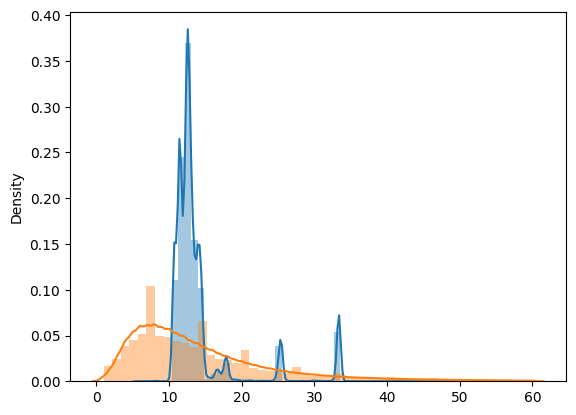

In [27]:
import seaborn as sns 

sns.distplot(y_pred , label ='prediction')
sns.distplot(y_train, label = 'acttual')
             

In [28]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, y_pred, squared = False)
print(f"Mean squared error: {rmse:.2f}")

Mean squared error: 8.53


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
#duplicating the linear regression approach for linear regression validation
validation = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
# Computing duration 
validation['duration'] = validation['tpep_dropoff_datetime'] - validation['tpep_pickup_datetime']
validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)

/tmp/ipykernel_3744/3380123620.py:4: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  validation['duration'] = validation['duration'].apply(lambda x : np.round(x.total_seconds()/60),2)


In [24]:
# validation  
# casting as strings first
validation = validation[(validation['duration'] >= 1 )&(validation['duration'] <= 60)]
validation['PULocationID'] = validation['PULocationID'].astype('str')
validation['DOLocationID'] = validation['PULocationID'].astype('str')

y_val = validation.duration.values

validation = validation[['PULocationID', 'DOLocationID']].to_dict(orient = 'records')


X_validation = dv.transform(validation)


In [31]:
y_val_pred = model.predict(X_validation)

In [32]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_val, y_val_pred, squared = False)
print(f"Mean squared error: {rmse:.2f}")

Mean squared error: 12.57


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# import pickle
# with open('/workspaces/mlops-zoomcamp/models/lin_reg.bin' , 'wb') as f_out:
#     pickle.dump((dv,model), f_out)

